# Linear Regression

Doing a linear regression is, in principle, very simple. We have a set of data points $(x_i, y_i)$ and we want to find a function $f(x)$ that fits the data. The function $f(x)$ is a linear combination of basis functions $\phi_j(x)$:

$$f(x) = w_0 + \sum_{j=1}^M w_j \phi_j(x)$$

In this course, we cover the class **Linear Regression**, which implies that the function $f(x)$ is linear in the parameters $w_j$. The basis functions $\phi_j(x)$ can be non-linear, but the overall function is linear in terms of the weights. The hyperplane is obtained using **Ordinary Least Squares (OLS)**, which minimizes the sum of squared differences between the observed values $y_i$ and the values predicted by the model $f(x_i)$.

<div class="alert alert-block alert-info">

## **Index**<br>

[1. **A Simple Example**](#1st-bullet)<br>
- [1.1 Create a Small Synthetic Dataset](#2nd-bullet)<br>
- [1.2 Fit the Model](#3rd-bullet)<br>
- [1.3 Evaluate the Model](#4th-bullet)<br>

[2. **Scikit-Learn Implementation**](#5th-bullet)<br>
- [2.1 Load a Real Dataset](#6th-bullet)<br>
- [2.2 Preprocess the Data](#7th-bullet)<br>
- [2.3 Fit the Model](#8th-bullet)<br>
- [2.4 Evaluate the Model](#9th-bullet)<br>

[3. **Computing p-values**](#10th-bullet)<br>
- [3.1 Fit the Model with stastomdels](#11th-bullet)<br>

[4. **Extra Material: Linear Regression Variants**](#13th-bullet)<br>
- [4.1 Ridge Regression](#14th-bullet)<br>
- [4.2 Lasso Regression](#15th-bullet)<br>
- [4.3 Elastic Net](#16th-bullet)<br>
</div>

__`Step 0`__ - The first thing you should do is always import the needed libraries. In this case, we are going to import:
- pandas as pd
- numpy as np
- LinearRegression from sklearn.linear_model
- train_test_split from sklearn.model_selection
- matplotlib.pyplot as plt

In [2]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error

np.random.seed(33)  # For reproducibility

### **A Simple Example** <a name="1st-bullet"></a>

### 1.1 Create a Small Synthetic Dataset <a name="2nd-bullet"></a>

We'll create a tiny synthetic dataset (houses) to illustrate ordinary least squares manually. The goal of this short example is to build intuition: compute the slope and intercept by hand using the closed-form formulas. Then, we will use the `LinearRegression` class from `sklearn` ton a larger dataset to see how the implementation works in practice.

Follow the steps below to compute the means, deviations and sums that lead to the OLS estimates for a single predictor.

>><font color='Orange'> __Practice__ - A 2D example from scratch</font>

You are going to work with the following dataset:

In [4]:
houses = pd.DataFrame({'m^2':[160,150,280,140,220,130],'Price':[360,340,664,330,560,380]})
houses

,m^2,Price
0,160,360
1,150,340
2,280,664
3,140,330
4,220,560
5,130,380


### 1.2 Fit the Model <a name="3rd-bullet"></a>

Below you will compute the sample means, create deviation columns and use the formula for the slope (beta1) and intercept (beta0). Doing this by hand is a great way to see how each term affects the result before using library routines.

It's time now to build a step by step a simple linear regression. To calculate the coefficient we are going to use the formula:

$$\beta _{1} = \frac{\sum \left ( x_{i}-\bar{x})( y_{i}-\bar{y}\right )}{\sum ( x_{i}-\bar{x})^{2}}$$

And the intercept is going to be calculated using the formula:
$$\beta _{0} = \bar{y} - \beta _{1}\bar{x} $$

__`Exercise A`__: Try to calculate the regression equation associated to the dataset step by step and predict the value for a house with $190m^{2}$

__`a.1.`__ Calculate the mean of the values in your X and assign it to the object __mean_m2__. In the same way, calculate the mean of your target and assign it to the object __mean_price__

In [6]:
mean_m2 = houses["m^2"].mean()
mean_m2

180.0

In [8]:
mean_price = houses["Price"].mean()
mean_price

439.0

__`a.2`__ Create a new column in your dataset 'houses' named as __xi-x_mean__ that will contain $( x_{i}-\bar{x})$

In [10]:
houses['xi-x_mean'] = houses["m^2"] - mean_m2
houses

,m^2,Price,xi-x_mean
0,160,360,-20.0
1,150,340,-30.0
2,280,664,100.0
3,140,330,-40.0
4,220,560,40.0
5,130,380,-50.0


__`a.3`__ Create a new column in your dataset 'houses' named as __yi-y_mean__ that will contain $( y_{i}-\bar{y})$

In [12]:
houses['yi-y_mean'] = houses["Price"] - mean_price
houses

,m^2,Price,xi-x_mean,yi-y_mean
0,160,360,-20.0,-79.0
1,150,340,-30.0,-99.0
2,280,664,100.0,225.0
3,140,330,-40.0,-109.0
4,220,560,40.0,121.0
5,130,380,-50.0,-59.0


__`a.4`__ Create a new column in your dataset 'houses' named as __square(xi-x_mean)__ that will be equal to $(x_{i}-\bar{x})^{2}$

In [14]:
houses['square(xi-x_mean)'] = houses['xi-x_mean']**2
houses

,m^2,Price,xi-x_mean,yi-y_mean,square(xi-x_mean)
0,160,360,-20.0,-79.0,400.0
1,150,340,-30.0,-99.0,900.0
2,280,664,100.0,225.0,10000.0
3,140,330,-40.0,-109.0,1600.0
4,220,560,40.0,121.0,1600.0
5,130,380,-50.0,-59.0,2500.0


__`a.5`__ Create a new column in your dataset 'houses' named as __(xi-x_mean)(yi-y_mean)__ that will be equal to $( x_{i}-\bar{x})( y_{i}-\bar{y})$

In [16]:
houses['(xi-x_mean)(yi-y_mean)'] = houses['xi-x_mean']*houses['yi-y_mean']
houses

,m^2,Price,xi-x_mean,yi-y_mean,square(xi-x_mean),(xi-x_mean)(yi-y_mean)
0,160,360,-20.0,-79.0,400.0,1580.0
1,150,340,-30.0,-99.0,900.0,2970.0
2,280,664,100.0,225.0,10000.0,22500.0
3,140,330,-40.0,-109.0,1600.0,4360.0
4,220,560,40.0,121.0,1600.0,4840.0
5,130,380,-50.0,-59.0,2500.0,2950.0


__`a.6`__ Calculate the coefficient of 'm^2' by using the formula below and assign it to the object __beta1__ <br> <br>
$$\beta _{1} = \frac{\sum \left ( x_{i}-\bar{x})( y_{i}-\bar{y}\right )}{\sum ( x_{i}-\bar{x})^{2}}$$

In [18]:
beta1 = houses['(xi-x_mean)(yi-y_mean)'].sum()/houses['square(xi-x_mean)'].sum()
beta1

2.3058823529411763

__`a.7`__ Calculate the intercept and name it as __beta0__ by using the formula <br><br>

$$\beta _{0} = \bar{y} - \beta _{1}\bar{x} $$

In [20]:
beta0 = mean_price - beta1*mean_m2
beta0

23.94117647058829

__`a.8`__ Predict the price of a house with $190m^{2}$

In [22]:
prediction = beta0 + beta1*190
prediction

462.05882352941177

### 1.3 Evaluate the Model <a name="4th-bullet"></a>

We predicted the price for a 190 m² house using the manually computed coefficients. Now we visualise the fit (scatter and fitted line) and discuss the fit quality informally. We will use the Boston dataset example later for quantitative evaluation.

### Plot your regression!

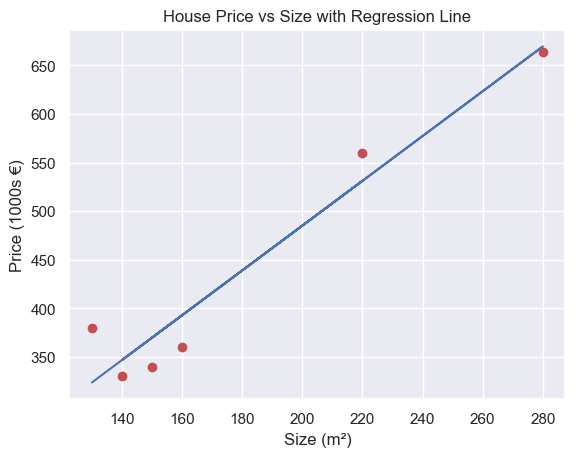

In [47]:
X = houses['m^2']
y = houses['Price']
predictions = []

for value in X:
    predictions.append(beta0 + beta1*value)

#create a figure with seaborn style
fig = plt.figure()
plt.plot(X, y, 'r.', markersize=12)
plt.plot(X, predictions, 'b-')

# add labels and title
plt.xlabel('Size (m²)')
plt.ylabel('Price (1000s €)')
plt.title('House Price vs Size with Regression Line')
plt.show()

We also have many of the points condensed in the bottom corner.

As you can see, we have the data points and the regression line that we have just calculated. Intuitively, the line seems to fit the data relatively well, but to get a better sense of how well, we can compute evaluation metrics:

a.9 Calculate the Mean Absolute Error (MAE) and name it as __mae__ using the formula below:<br><br>
$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

In [48]:
mae = np.mean(np.abs(houses['Price'] - predictions))
mae

28.352941176470598

Average difference between predictions and target. We would compute the lowest MAE. On average our model misses by 28$

### **Scikt-Learn Implementation** <a name="5th-bullet"></a>

Now that we have built some intuition by calculating the coefficients manually, let's see how to implement linear regression using the `scikit-learn` library. Since we are dealing with linear regression, we are going to work with a dataset where the target is continuous. We will use the Boston housing dataset for this purpose.<br>

### 2. Import the dataset <a name="6th-bullet"></a>


__`Step 2.1`__ - Import the dataset __Boston.csv__ using pandas and assign it to an object named __data__

### 2.1 Load a Real Dataset <a name="6th-bullet"></a>

We load the Boston housing dataset to practice a full scikit-learn workflow: preprocessing, train/validation split, fitting a LinearRegression model, and evaluating performance. The target variable is `medv` (median value of homes in $1000's).

In [27]:
data = pd.read_csv('datasets/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Variables:<br>

`INPUT VARIABLES`: numerical <br>
`OUPUT VARIABLE`: numeric (regression) <br>

__GOAL__: Predict median value of homes

`CRIM` : per capita crime rate by town <br>
`ZN` : proportion of residential land zoned for lots over 25,000 sq.ft. <br>
`INDUS` : proportion of non-retail business acres per town. <br>
`CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
`NOX` : nitric oxides concentration (parts per 10 million) <br>
`RM`: average number of rooms per dwelling <br>
`AGE`: proportion of owner-occupied units built prior to 1940 <br>
`DIS`: weighted distances to five Boston employment centres <br>
`RAD`: index of accessibility to radial highways <br>
`TAX`: full-value property-tax rate per \$10.000 <br>
`PTRATIO`: pupil-teacher ratio by town <br>
`B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
`LSTAT`: % lower status of the population <br>
`MEDV`: Median value of owner-occupied homes in $1000's <br>

### 2.2 Preprocess the Data <a name="7th-bullet"></a>

Placeholder: common preprocessing steps include handling missing values, scaling features, and encoding categorical variables. For the Boston dataset we will confirm there are no missing values and then consider scaling the features before fitting linear models. Add any dataset-specific preprocessing here.

### 3. Explore the dataset

The next step is to explore our data: while this is not the focus for this class, we are just going to check if we don't have missing values and what is the type of data that we have.

__`Step 2.2`__ - Call the method __info()__ in your data. <br>
This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


By calling the __info()__ method, we can verify that we don't have missing values and all data is numerical, so there is no need to deal with missing data or create dummies. <br>
We are ready to apply linear regression in our dataset! But first, and since we want to evaluate the performance of our model, we need to split our dataset into training and validation. Since we only have 506 observations, we are not going to create a test dataset.

### 4. Data partition

__`Step 2.3`__ - By calling the method __train_test_split()__, split your dataset into train (70%) and validation (30%). Don't forget that you need to define first what are your independent variables and your target/ dependent variable. <br>

- Define as __X__ the independent variables and __y__ the dependent variable (last column - 'medv')
- Divide the __X__ into __X_train__ and __X_val__, the __y__ into __y_train__ and __y_val__, and define the following arguments: __test_size = 0.3__, __random_state = 15__ 

In [29]:
X = data.drop(columns=['medv'])
y = data['medv']

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.3, 
                                                  random_state=33) #since we are dealing with regression, we do not need to stratify

### 2.3 Fit the Model <a name="8th-bullet"></a>

__`Step 2.4`__ - Create an instance of LinearRegression named as lin_model with the default parameters and fit to your train data. We'll fit on `X_train` / `y_train`.

In [33]:
lin_model = LinearRegression()

<div class="alert alert-block alert-success">
    <b><h3>Methods in LinearRegression()</h3></b><br>
</div>

<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression().fit(X,y,...)</a>

__Definition:__ <br>
Fit linear model in the training data.

__Parameters:__ <br>
X : The regressors in my training dataset; <br>
y : The target in my training dataset; <br>
...
</div>

__`Step 2.5`__ - Fit your model to your data, and define __X = X_train__ and __y = y_train__

In [35]:
lin_model.fit(X_train, y_train)
#by default there will be a line intercept

LinearRegression()

<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression().predict(X)</a>

__Definition:__ <br>
Predict using the linear model.

__Parameters:__ <br>
X : Samples to predict; <br>
...

</div>

__`Step 2.6`__ - Predict the values for __X_val__ by applying the method __predict()__ to your model and check your result

In [37]:
predictions = lin_model.predict(X_val)
predictions

array([20.26132887, 11.12890007, 13.82627828, 18.13795816, 22.74068948,
       20.81362135, 37.06672084, 14.57964237, 23.18047766, 22.29283728,
       25.30760875, 37.28366292,  5.26162191, 25.54689587, 11.14149317,
       23.86701965, 17.53621385, 19.22877681, 32.30964337, 22.46328135,
       13.66494099, 19.84901793, 18.33905479, 18.58967918, 34.21945675,
       15.5474774 , 25.68842945, 25.01817805, 11.611136  , 34.6951032 ,
       16.40332985, 25.7936335 ,  4.9636998 , 15.87579626, 30.22113715,
       34.01330171, 25.36639356,  5.0435889 , 20.0914974 , 29.24920209,
       17.66206447, 13.68787519, 30.35709343, 15.74004133, 30.31485688,
       20.30855375, 21.86998166, 17.2791456 , 24.09261766, 21.15547882,
       17.34757262, 36.12785159, 10.52813864, 16.39129236, 24.76060752,
       14.05706367, 25.14308632, 15.23217452, 22.53938422, 23.78169103,
       16.895084  , 18.79193305, 35.81800064, 22.20600093, 17.97053995,
       25.29602065, 28.39118047, -0.76151906, 13.54367738, 30.23

__`Step 2.7`__ - Create a Dataset named*results* with two columns: the real values (__y_val__) and the predicted values (__y_pred__).

In [39]:
val_results = pd.DataFrame({'y_true': y_val.values.flatten(), 'y_pred': predictions.flatten()}, 
                           index=y_val.index #ensures we can map the predictions to each observation correctly
                           )
val_results

,y_true,y_pred
122,20.5,20.261329
400,5.6,11.128900
423,13.4,13.826278
447,12.6,18.137958
44,21.2,22.740689
...,...,...
492,20.1,14.919883
440,10.5,12.261295
134,15.6,13.043790
363,16.8,21.025872


Now that we have predicted the values for our validation dataset, we need to evaluate the performance of our model. Since we are dealing with regression, we are going to use the following metrics: Mean Absolute Error (MAE) and $R^2$.

In [41]:
# Training metrics (step 2)
y_pred_train = lin_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print('Training metrics:')
print(f'R²: {r2_train:.4f}')
print(f'MAE: {mae_train:.4f}')

Training metrics:
R²: 0.7541
MAE: 3.2887


In [43]:
# Validation metrics (step 1)
r2_val = r2_score(y_val, predictions)
mae_val = mean_absolute_error(y_val, predictions)

print('Validation metrics:')
print(f'R²: {r2_val:.4f}')
print(f'MAE: {mae_val:.4f}')

#The lower R2 here indicates that the model fits better on the training set and probably tehre is overfitting

Validation metrics:
R²: 0.6846
MAE: 3.4397


### 2.4 Evaluate the Model <a name="9th-bullet"></a>

Placeholder: after predicting on `X_val`, compute metrics such as R², Adjusted R², MSE and MAE. Use sklearn.metrics (r2_score, mean_squared_error, mean_absolute_error) to report validation performance and compare with training metrics to check for overfitting.

Those are the predicted values to your validation dataset by applying the model created previously based on train data.

<div class="alert alert-block alert-success">
    <b><h3>Attributes in LinearRegression()</h3></b><br>
</div>

<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression().coef_</a>

__Definition:__ <br>
Coefficient of the features in the decision function.

</div>

__`Step 2.7`__ - To check the coefficients calculated by applying the linear regression, call the attribute __coef___ associated to your model

In [45]:
lin_model.coef_

array([-1.26344270e-01,  4.92843878e-02, -6.72157053e-04,  3.18525778e+00,
       -1.46742932e+01,  4.12294308e+00, -5.78913516e-03, -1.57407880e+00,
        3.34624794e-01, -1.42107385e-02, -9.17844246e-01,  6.43121442e-03,
       -5.51108318e-01])

The result is an array that shows all the coefficients. In order to better understand what is the variable associated to each coefficient, let's convert the result to a DataFrame and define as headers the variables.

__`Step 2.8`__ - Create a dataframe that will contain the values of the coefficients

In [60]:
coefs = pd.DataFrame(lin_model.coef_)
coefs

,0
0,-0.126344
1,0.049284
2,-0.000672
3,3.185258
4,-14.674293
5,4.122943
6,-0.005789
7,-1.574079
8,0.334625
9,-0.014211


__`Step 2.9`__ - By using the method __set_index()__, define the index of Dataframe equal to the name of the variables

In [61]:
coefs = coefs.set_index(X_train.columns)
coefs

,0
crim,-0.126344
zn,0.049284
indus,-0.000672
chas,3.185258
nox,-14.674293
rm,4.122943
age,-0.005789
dis,-1.574079
rad,0.334625
tax,-0.014211


<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression().intercept_</a>

__Definition:__ <br>
Independent term in the linear model.

</div>

__`Step 2.10`__ - To obtain the intercept of the linear regression, call the attribute __intercept___ associated to your model

In [62]:
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0.
lin_model.intercept_

35.04496345263762

<div class="alert alert-block alert-warning"> 
<h1><center>Calculate the p-values</center></h1>
</div>

<a name="10th-bullet"></a>

For descriptive/interpretability purposes, it may be useful to obtain inference statistics (standard errors, t-values, p-values) using `statsmodels`. We will use this library because `sklearn` does not provide this information directly and other libraries that would provide this information are not very well maintained (e.g. the package `regressors`). 

In [63]:
# Compare with sklearn coefficients
sk_coef = np.concatenate(([lin_model.intercept_], np.asarray(lin_model.coef_).ravel()))
print('\nSklearn intercept and coefficients:')
print(pd.Series(sk_coef, index=['Intercept'] + list(X_train.columns)))


Sklearn intercept and coefficients:
Intercept    35.044963
crim         -0.126344
zn            0.049284
indus        -0.000672
chas          3.185258
nox         -14.674293
rm            4.122943
age          -0.005789
dis          -1.574079
rad           0.334625
tax          -0.014211
ptratio      -0.917844
black         0.006431
lstat        -0.551108
dtype: float64


### 3.1 Create a Separate Model using Statsmodels<a name="11th-bullet"></a>

For multivariate linear regression, we tend to use `sklearn` because of the familiarity its syntax has with the one used in other algorithms. However, interpretability-wise, `sklearn` only allows us to access the coefficients. Other packages have the ability to also create linear regressions (e.g. `numpy`, `scipy` or even `statsmodels.api`). Since the estimation method is the same (OLS), we can use `statsmodels` to obtain a full statistical summary of the fitted model, including standard errors, t-values, p-values, and confidence interval.

### 3.2 Extract p-values / alternatives <a name="12th-bullet"></a>

#### Alternatives to the `regressors` package

`scikit-learn` does not provide p-values or standard errors out of the box. If you need inference statistics there are three practical options:

- Use `statsmodels.api.OLS` which gives a full statistical summary (p-values, SEs, t-stats, etc.).
- Compute standard errors and p-values manually from the fitted `LinearRegression` object and the design matrix (example helper can be provided so you keep a scikit-learn friendly workflow).

In [64]:
# Statsmodels (full statistical summary)
import statsmodels.api as sm
X_sm = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_sm).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     80.19
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           4.21e-95
Time:                        15:09:32   Log-Likelihood:                -1048.7
No. Observations:                 354   AIC:                             2125.
Df Residuals:                     340   BIC:                             2179.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0450      6.091      5.754      0.0

The summary statistic table calls many of the stats outputs the statistics in an pretty format, containing all the needed values to interpret our model: The residuals distribution, the coefficients and the t-value and the p-value for each of them, and also the evaluation of the model using the metrics R-Squared, Adjusted R-Squared and F-statistic. That evaluation, however, is based on the performance of the model in the training dataset. <br> If you want to see how to compute these metrics for the validation data, in the last class we saw how to calculate the R-Squared and the Adjusted R-Squared to our validation dataset by using __sklearn__.

__The p-value__ <br>
For each estimated regression coefficient, the p-value provides an estimate of the probability that the true coefficient is zero given the value of the estimate. Small p-values suggest that the true coefficient is very unlikely to be zero, which means that the feature is extremely unlikely to have no relationship with the dependent variable. <br> In this way, we can also check the p-value to understand the feature importance and select the most "important" variables to build our final model.




### 4. Extra Material: Linear Regression Variants <a name="13th-bullet"></a>

Despite its simplicity, linear regression is a powerful algorithm that can be used as a baseline for regression tasks. However, it has some limitations, such as sensitivity to outliers and multicollinearity among predictors. To try to address these issues, there are variants of linear regression that add a penalty term to the loss function. In this notebook, we will show the implementations of 3: Ridge Regression (which uses L2 norm), Lasso Regression (which uses L1 norm), and Elastic Net (which uses both).

**Key Concept: How Regularization Changes the Optimization**

All linear regression variants use the same **prediction formula**:
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p$$

The difference lies in **what we minimize** during training:

| Method | Optimization Objective |
|--------|----------------------|
| **OLS** | $\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ |
| **Ridge** | $\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2$ |
| **Lasso** | $\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \lvert\beta_j\rvert$ |
| **Elastic Net** | $\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \left[ \rho \sum_{j=1}^{p} \lvert\beta_j\rvert + \frac{(1-\rho)}{2} \sum_{j=1}^{p} \beta_j^2 \right]$ |

The **penalty terms** (everything after the sum of squared errors) control how large the coefficients can become, helping to prevent overfitting.

#### 4.1 Ridge Regression (L2 Regularization)

Ridge regression adds an **L2 penalty** term to the loss function, which helps prevent overfitting by penalizing large coefficient values. This is particularly useful when dealing with multicollinearity.

**OLS Prediction Formula (Standard Linear Regression):**
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p$$

**OLS Optimization (what we minimize):**
$$\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Ridge Optimization (with L2 penalty):**
$$\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2$$

**Key Difference:** Ridge adds the term $\alpha \sum_{j=1}^{p} \beta_j^2$ which penalizes the **squared magnitude** of coefficients. This shrinks coefficients toward zero but never exactly to zero. Higher values of $\alpha$ lead to more regularization (smaller coefficients).

<div class="alert alert-block alert-info">
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html'>sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, solver='auto')</a>

__Definition:__ <br>
Linear least squares with L2 regularization. Minimizes the residual sum of squares between observed targets and predicted targets plus a penalty term proportional to the squared L2 norm of the coefficient vector.

__Key Parameters:__ <br>
- `alpha`: Regularization strength; must be a positive float. Larger values specify stronger regularization (default=1.0). <br>
- `fit_intercept`: Whether to calculate the intercept for this model (default=True). <br>
- `solver`: Solver to use in the computational routines (default='auto'). <br>

__Methods:__ <br>
- `.fit(X, y)`: Fit Ridge regression model. <br>
- `.predict(X)`: Predict using the linear model. <br>

__Attributes:__ <br>
- `.coef_`: Estimated coefficients for the linear regression problem. <br>
- `.intercept_`: Independent term in the linear model. <br>
</div>

**Implementation:**

In [65]:
from sklearn.linear_model import Ridge

# Create Ridge regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_val = ridge_model.predict(X_val)

# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error

print("Ridge Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_ridge_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_ridge_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_ridge_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_ridge_val):.2f}")
print(f"\nIntercept: {ridge_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train.columns, ridge_model.coef_):
    print(f"  {feature}: {coef:.4f}")

Ridge Regression Results:
Training R²: 0.7523
Validation R²: 0.6756
Training MAE: 3.30
Validation MAE: 3.48

Intercept: 30.45
Coefficients:
  crim: -0.1236
  zn: 0.0508
  indus: -0.0313
  chas: 3.0363
  nox: -7.3269
  rm: 4.1309
  age: -0.0113
  dis: -1.4670
  rad: 0.3225
  tax: -0.0151
  ptratio: -0.8445
  black: 0.0066
  lstat: -0.5630


#### 4.2 Lasso Regression (L1 Regularization)

Lasso (Least Absolute Shrinkage and Selection Operator) uses an **L1 penalty** that can shrink some coefficients to exactly zero, effectively performing **feature selection**.

**OLS Prediction Formula (Standard Linear Regression):**
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p$$

**OLS Optimization (what we minimize):**
$$\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Lasso Optimization (with L1 penalty):**
$$\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \lvert\beta_j\rvert$$

**Key Difference:** Lasso adds the term $\alpha \sum_{j=1}^{p} \lvert\beta_j\rvert$ which penalizes the **absolute value** of coefficients. Unlike Ridge, this can force some coefficients to become **exactly zero**, thus performing automatic feature selection. This makes Lasso particularly useful for high-dimensional datasets where you want to identify the most important features.

<div class="alert alert-block alert-info">
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html'>sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, max_iter=1000)</a>

__Definition:__ <br>
Linear Model trained with L1 prior as regularizer (aka the Lasso). The optimization objective minimizes the residual sum of squares with a penalty proportional to the L1 norm (absolute value) of the coefficient vector. This can lead to sparse models where some coefficients are exactly zero.

__Key Parameters:__ <br>
- `alpha`: Constant that multiplies the L1 term, controlling regularization strength (default=1.0). <br>
- `fit_intercept`: Whether to calculate the intercept for this model (default=True). <br>
- `max_iter`: Maximum number of iterations for the optimization algorithm (default=1000). <br>
- `selection`: Method for updating coefficients - 'cyclic' or 'random' (default='cyclic'). <br>

__Methods:__ <br>
- `.fit(X, y)`: Fit Lasso regression model. <br>
- `.predict(X)`: Predict using the linear model. <br>

__Attributes:__ <br>
- `.coef_`: Estimated coefficients (some may be exactly 0 if features are not selected). <br>
- `.intercept_`: Independent term in the linear model. <br>
- `.n_iter_`: Number of iterations run by the coordinate descent solver. <br>
</div>

**Implementation:**

In [66]:
from sklearn.linear_model import Lasso

# Create Lasso regression model with alpha=1.0
lasso_model = Lasso(alpha=1.0, max_iter=10000)

# Fit the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train)
y_pred_lasso_val = lasso_model.predict(X_val)

# Evaluate the model
print("Lasso Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_lasso_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_lasso_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_lasso_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_lasso_val):.2f}")
print(f"\nIntercept: {lasso_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train.columns, lasso_model.coef_):
    print(f"  {feature}: {coef:.4f}")

Lasso Regression Results:
Training R²: 0.7028
Validation R²: 0.6635
Training MAE: 3.59
Validation MAE: 3.55

Intercept: 42.66
Coefficients:
  crim: -0.0773
  zn: 0.0493
  indus: -0.0000
  chas: 0.0000
  nox: -0.0000
  rm: 1.2837
  age: 0.0208
  dis: -0.7796
  rad: 0.3119
  tax: -0.0177
  ptratio: -0.8120
  black: 0.0061
  lstat: -0.7797


#### 4.3 Elastic Net Regression (L1 + L2 Regularization)

Elastic Net combines both **L1 and L2 penalties**, providing a balance between Ridge and Lasso. It's particularly useful when there are multiple correlated features.

**OLS Prediction Formula (Standard Linear Regression):**
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p$$

**OLS Optimization (what we minimize):**
$$\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Elastic Net Optimization (with combined L1 + L2 penalty):**
$$\min_{\beta} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \left[ \rho \sum_{j=1}^{p} \lvert\beta_j\rvert + \frac{(1-\rho)}{2} \sum_{j=1}^{p} \beta_j^2 \right]$$

**Key Difference:** Elastic Net adds a **weighted combination** of both L1 and L2 penalties:
- $\alpha$ controls the overall regularization strength
- $\rho$ (l1_ratio) controls the mix between L1 and L2:
  - $\rho = 0$: Pure Ridge (L2 only)
  - $\rho = 1$: Pure Lasso (L1 only)
  - $0 < \rho < 1$: Combination of both

This combines Ridge's ability to handle correlated features with Lasso's feature selection capability.

<div class="alert alert-block alert-info">
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html'>sklearn.linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, max_iter=1000)</a>

__Definition:__ <br>
Linear regression with combined L1 and L2 priors as regularizer. The optimization objective minimizes the residual sum of squares with a penalty that is a combination of both L1 (Lasso) and L2 (Ridge) regularization terms. Useful when there are multiple features correlated with each other.

__Key Parameters:__ <br>
- `alpha`: Constant that multiplies the penalty terms (default=1.0). <br>
- `l1_ratio`: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1 (default=0.5). <br>
  - For l1_ratio = 0, the penalty is an L2 penalty (Ridge). <br>
  - For l1_ratio = 1, it is an L1 penalty (Lasso). <br>
  - For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2. <br>
- `fit_intercept`: Whether to calculate the intercept (default=True). <br>
- `max_iter`: Maximum number of iterations (default=1000). <br>

__Methods:__ <br>
- `.fit(X, y)`: Fit ElasticNet model. <br>
- `.predict(X)`: Predict using the linear model. <br>

__Attributes:__ <br>
- `.coef_`: Estimated coefficients for the linear regression problem. <br>
- `.intercept_`: Independent term in the linear model. <br>
- `.n_iter_`: Number of iterations run by the coordinate descent solver. <br>
</div>

**Implementation:**

In [67]:
from sklearn.linear_model import ElasticNet

# Create Elastic Net model with alpha=1.0 and l1_ratio=0.5 (equal mix of L1 and L2)
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)

# Fit the model
elastic_model.fit(X_train, y_train)

# Make predictions
y_pred_elastic_train = elastic_model.predict(X_train)
y_pred_elastic_val = elastic_model.predict(X_val)

# Evaluate the model
print("Elastic Net Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_elastic_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_elastic_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_elastic_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_elastic_val):.2f}")
print(f"\nIntercept: {elastic_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train.columns, elastic_model.coef_):
    print(f"  {feature}: {coef:.4f}")
    
# Count how many features were selected (non-zero coefficients)
n_features_selected = sum(elastic_model.coef_ != 0)
print(f"\nFeatures selected: {n_features_selected} out of {len(elastic_model.coef_)}")

Elastic Net Regression Results:
Training R²: 0.7016
Validation R²: 0.6592
Training MAE: 3.60
Validation MAE: 3.59

Intercept: 45.19
Coefficients:
  crim: -0.0935
  zn: 0.0538
  indus: -0.0191
  chas: 0.0000
  nox: -0.0000
  rm: 1.0546
  age: 0.0227
  dis: -0.8614
  rad: 0.3550
  tax: -0.0190
  ptratio: -0.8377
  black: 0.0062
  lstat: -0.7888

Features selected: 11 out of 13


#### 4.4 Comparing All Models

Let's compare the performance of all four models (OLS, Ridge, Lasso, and Elastic Net) side by side:

In [ ]:
# Create comparison dataframe
comparison = pd.DataFrame({
    'Model': ['OLS (sklearn)', 'Ridge', 'Lasso', 'Elastic Net'],
    'Train R²': [
        r2_score(y_train, y_pred_train),
        r2_score(y_train, y_pred_ridge_train),
        r2_score(y_train, y_pred_lasso_train),
        r2_score(y_train, y_pred_elastic_train)
    ],
    'Val R²': [
        r2_score(y_val, lin_model.predict(X_val)),
        r2_score(y_val, y_pred_ridge_val),
        r2_score(y_val, y_pred_lasso_val),
        r2_score(y_val, y_pred_elastic_val)
    ],
    'Train MAE': [
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_train, y_pred_ridge_train),
        mean_absolute_error(y_train, y_pred_lasso_train),
        mean_absolute_error(y_train, y_pred_elastic_train)
    ],
    'Val MAE': [
        mean_absolute_error(y_val, lin_model.predict(X_val)),
        mean_absolute_error(y_val, y_pred_ridge_val),
        mean_absolute_error(y_val, y_pred_lasso_val),
        mean_absolute_error(y_val, y_pred_elastic_val)
    ]
})

print("Model Comparison:")
comparison

Model Comparison:


,Model,Train R²,Val R²,Train MAE,Val MAE
0,OLS (sklearn),0.754060,0.684585,3.288689,3.439723
1,Ridge,0.752332,0.675550,3.295314,3.479771
2,Lasso,0.702805,0.663480,3.586822,3.550381
3,Elastic Net,0.701611,0.659179,3.596005,3.593509


#### 4.5 Summary and Best Practices

**When to use each variant:**

1. **Ordinary Least Squares (OLS):**
   - Good baseline model
   - Use when you have few features relative to samples
   - Interpretability is important
   - No multicollinearity issues

2. **Ridge Regression (L2):**
   - When you have multicollinearity (correlated features)
   - You want to keep all features but reduce their magnitude
   - Prevents overfitting by shrinking coefficients

3. **Lasso Regression (L1):**
   - When you need feature selection (automatic variable selection)
   - High-dimensional datasets with many irrelevant features
   - Want a sparse model (some coefficients exactly zero)

4. **Elastic Net:**
   - Best of both worlds: handles multicollinearity AND performs feature selection
   - When you have many correlated features
   - More stable than Lasso when features are highly correlated
   - Good default choice for regularized regression

**General Tips:**
- Always standardize/normalize features before applying regularization
- Start with Elastic Net if unsure which regularization to use
- Compare validation performance,

**Visual Summary:**

| Method | Penalty Type | Feature Selection | Handles Multicollinearity | Coefficients Can Be Zero |
|--------|-------------|-------------------|---------------------------|-------------------------|
| OLS | None | No | No | No |
| Ridge (L2) | $\sum \beta_j^2$ | No | Yes | No (shrink toward 0) |
| Lasso (L1) | $\sum \lvert\beta_j\rvert$ | Yes | Partially | Yes (exactly 0) |
| Elastic Net | L1 + L2 | Yes | Yes | Yes (exactly 0) |